In [3]:
!pip install kaggle

In [2]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = '/content'


In [1]:
import zipfile

with zipfile.ZipFile('dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

with zipfile.ZipFile('data/train.zip', 'r') as zip_ref:
    zip_ref.extractall('data/train')

In [4]:
import os
import shutil
from sklearn.model_selection import train_test_split

base_dir = 'data/train/train'
train_dir = 'data/train_split'
val_dir = 'data/val_split'

os.makedirs(os.path.join(train_dir, 'cats'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'dogs'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'cats'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'dogs'), exist_ok=True)

filenames = os.listdir(base_dir)
train_files, val_files = train_test_split(filenames, test_size=0.2, random_state=42)

for file in train_files:
    if 'dog' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(train_dir, 'dogs', file))
    elif 'cat' in file:
          shutil.move(os.path.join(base_dir, file), os.path.join(train_dir, 'cats', file))

for file in val_files:
    if 'dog' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(val_dir, 'dogs', file))
    elif 'cat' in file:
          shutil.move(os.path.join(base_dir, file), os.path.join(val_dir, 'cats', file))


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

val_generator = train_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')



Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [8]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,  activation='relu'),
    layers.Dense(1,  activation='sigmoid'),

])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']

)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator

)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 78ms/step - accuracy: 0.5771 - loss: 0.6844 - val_accuracy: 0.6772 - val_loss: 0.6053
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 72ms/step - accuracy: 0.7263 - loss: 0.5448 - val_accuracy: 0.7724 - val_loss: 0.4656
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.8076 - loss: 0.4252 - val_accuracy: 0.8158 - val_loss: 0.4112
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 74ms/step - accuracy: 0.8474 - loss: 0.3415 - val_accuracy: 0.8110 - val_loss: 0.4201
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 70ms/step - accuracy: 0.8943 - loss: 0.2473 - val_accuracy: 0.8184 - val_loss: 0.4368
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 70ms/step - accuracy: 0.9410 - loss: 0.1522 - val_accuracy: 0.8194 - val_loss: 0.5398
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.9723 - loss: 0.0768 - val_accuracy: 0.8212 - val_loss: 0.6237
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 70ms/step - accuracy: 0.9877 - loss: 0.0446 - val_accurac

157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.8168 - loss: 1.0273
Validation Accuracy: 0.82


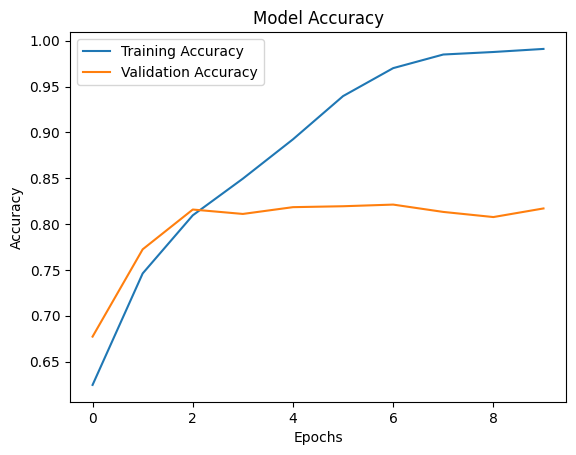

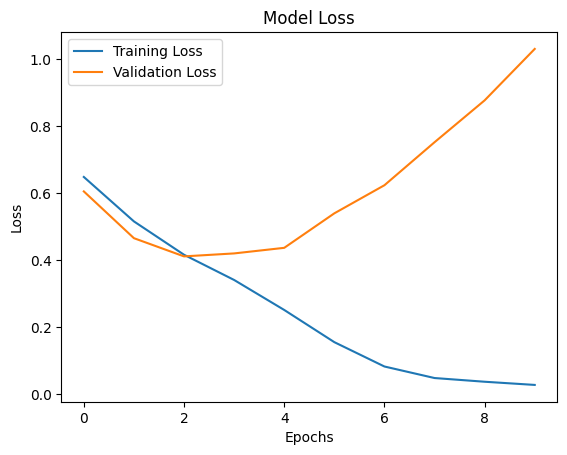

In [11]:
import matplotlib.pyplot as plt

#print accuracy
loss, accuracy = model.evaluate(val_generator)
print(f'Validation Accuracy: {accuracy:.2f}')

#plot loss and accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
#save model
model.save('dogs_vs_cats_cnn.keras')